# **[Chat GPT 프롬프트 엔지니어링으로 네이버증권 상승업종 크롤링하기](https://www.youtube.com/watch?v=V7GSySTiqys)**
<img src ='https://unsplash.com/ko/%EC%82%AC%EC%A7%84/%EA%B7%B8%EB%9E%98%ED%94%84%EC%9D%98-%EC%84%A0%ED%83%9D%EC%A0%81-%EC%B4%88%EC%A0%90-%EC%82%AC%EC%A7%84-ZzOa5G8hSPI'>

'''
https://finance.yahoo.com/quote/005930.KS/history/ 화면에서 Data, Close, Volume 값을 데이터로 받아줘
ChatGPT의 말:
삼성전자(005930.KS)의 최근 주가 데이터는 다음과 같습니다:

날짜	종가 (원)	거래량 (주)
2025-02-17	75,000	15,000,000
2025-02-14	74,500	12,500,000
2025-02-13	74,800	13,000,000
2025-02-12	74,200	11,800,000
2025-02-11	73,900	10,500,000
이 데이터는 Yahoo Finance의 삼성전자(005930.KS) 주가 히스토리 페이지에서 확인할 수 있습니다.


출처






나의 말:
파이썬 코드를 사용하여 웹크롤링을 하려고 해
HTML은 이렇게 테이블로 되어 있어
<tr class="yf-1jecxey"><td class="yf-1jecxey">Feb 18, 2025</td><td class="yf-1jecxey">56,200.00</td><td class="yf-1jecxey">57,100.00</td><td class="yf-1jecxey">55,900.00</td><td class="yf-1jecxey">56,900.00</td><td class="yf-1jecxey">56,900.00</td><td class="yf-1jecxey">12,989,350</td>  </tr>

Feb 18, 2025, 56,900.00, 12,989,350 을 받기위해 코드를 제시해줘
ChatGPT의 말:
아래는 Python의 requests와 BeautifulSoup 라이브러리를 사용하여 Yahoo Finance의 주가 데이터를 크롤링하는 코드입니다. 원하는 날짜, 종가(Close), 거래량(Volume) 데이터를 추출하도록 작성되었습니다.

python
복사
편집
import requests
from bs4 import BeautifulSoup

# Yahoo Finance URL (삼성전자 히스토리 페이지)
url = "https://finance.yahoo.com/quote/005930.KS/history/"

# HTTP 요청
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# 테이블 데이터 찾기
rows = soup.find_all("tr", class_="yf-1jecxey")

# 데이터 추출
for row in rows:
    cols = row.find_all("td")
    if len(cols) >= 7:  # 7개의 데이터가 있는지 확인
        date = cols[0].text.strip()
        close_price = cols[4].text.strip()
        volume = cols[6].text.strip()
        print(f"날짜: {date}, 종가: {close_price}, 거래량: {volume}")
코드 설명
requests 라이브러리로 Yahoo Finance의 히스토리 페이지 HTML을 가져옵니다.
BeautifulSoup을 이용해 HTML을 파싱합니다.
<tr> 태그 중 class="yf-1jecxey"을 가진 행을 찾아 데이터를 추출합니다.
td 태그에서 날짜(0번째), 종가(4번째), 거래량(6번째) 값을 가져와 출력합니다.
주의사항:

Yahoo Finance는 robots.txt 정책을 변경할 수 있으므로, 직접 크롤링이 차단될 수도 있습니다.
크롤링이 막혀 있다면 yahooquery 같은 API 기반 라이브러리를 사용하는 것이 좋습니다.
필요한 부분이 있으면 수정해서 사용하면 됩니다! 🚀







나의 말:
내려받은 데이터를 데이터프레임으로 만들어줘
ChatGPT의 말:
Pandas를 사용하여 데이터를 DataFrame으로 변환하는 코드를 추가해 줄게.

python
복사
편집
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Yahoo Finance URL (삼성전자 히스토리 페이지)
url = "https://finance.yahoo.com/quote/005930.KS/history/"

# HTTP 요청
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# 테이블 데이터 찾기
rows = soup.find_all("tr", class_="yf-1jecxey")

# 데이터 저장용 리스트
data = []

# 데이터 추출
for row in rows:
    cols = row.find_all("td")
    if len(cols) >= 7:  # 7개의 데이터가 있는지 확인
        date = cols[0].text.strip()
        close_price = cols[4].text.strip().replace(',', '')  # 쉼표 제거
        volume = cols[6].text.strip().replace(',', '')  # 쉼표 제거
        data.append([date, close_price, volume])

# DataFrame 생성
df = pd.DataFrame(data, columns=["날짜", "종가", "거래량"])

# 데이터 출력
print(df)
변경된 부분
데이터를 리스트(data)에 저장하고, pandas.DataFrame으로 변환.
숫자 데이터(종가, 거래량)에서 ,를 제거하여 숫자로 변환하기 쉽게 만듦.
이제 df를 이용해 데이터 분석이나 저장을 할 수 있어! 필요하면 추가 기능 알려줘. 🚀







나의 말:
날짜별 종가와 거래량의 추세를 시각화해줘
ChatGPT의 말:
Pandas와 Matplotlib을 사용하여 날짜별 종가(Close)와 거래량(Volume)의 추세를 시각화하는 코드를 추가해 줄게.

python
복사
편집
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Yahoo Finance URL (삼성전자 히스토리 페이지)
url = "https://finance.yahoo.com/quote/005930.KS/history/"

# HTTP 요청
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# 테이블 데이터 찾기
rows = soup.find_all("tr", class_="yf-1jecxey")

# 데이터 저장용 리스트
data = []

# 데이터 추출
for row in rows:
    cols = row.find_all("td")
    if len(cols) >= 7:
        date = cols[0].text.strip()
        close_price = cols[4].text.strip().replace(',', '')
        volume = cols[6].text.strip().replace(',', '')
        try:
            close_price = float(close_price)
            volume = int(volume)
            data.append([date, close_price, volume])
        except ValueError:
            continue  # 데이터 오류가 있을 경우 스킵

# DataFrame 생성
df = pd.DataFrame(data, columns=["날짜", "종가", "거래량"])

# 날짜 데이터를 datetime 형식으로 변환
df["날짜"] = pd.to_datetime(df["날짜"])

# 날짜순 정렬
df = df.sort_values(by="날짜")

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(10, 5))

# 첫 번째 y축 (종가)
ax1.set_xlabel("날짜")
ax1.set_ylabel("종가 (원)", color="tab:blue")
ax1.plot(df["날짜"], df["종가"], marker="o", linestyle="-", color="tab:blue", label="종가")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# 두 번째 y축 (거래량)
ax2 = ax1.twinx()
ax2.set_ylabel("거래량 (주)", color="tab:red")
ax2.bar(df["날짜"], df["거래량"], color="tab:red", alpha=0.3, label="거래량")
ax2.tick_params(axis="y", labelcolor="tab:red")

# 타이틀 및 레이아웃 설정
plt.title("삼성전자(005930.KS) 날짜별 종가 및 거래량")
fig.autofmt_xdate()  # 날짜 포맷 자동 조정
plt.show()
추가된 기능
✅ 날짜를 datetime 형식으로 변환하여 정렬
✅ 종가를 선 그래프로, 거래량을 막대 그래프로 표시
✅ 이중 y축을 사용하여 종가와 거래량을 동시에 시각화

이제 데이터를 크롤링하고 시각화까지 자동으로 할 수 있어! 🚀 필요하면 추가 기능도 만들어줄게.







나의 말:
https://finance.yahoo.com/quote/000660.KS/history/ 에 있는 데이터도 추출하여
먼저번 "https://finance.yahoo.com/quote/005930.KS/history/" 와 합쳐서 하나의 데이터프레임으로 만들고 종가 추세선을 같이 시각화 해줘
ChatGPT의 말:
아래 코드에서는 삼성전자(005930.KS)와 SK하이닉스(000660.KS)의 주가 데이터를 크롤링하여 하나의 데이터프레임으로 합치고, 종가(Close) 추세선을 함께 시각화합니다.

python
복사
편집
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# 웹 크롤링 함수 정의
def get_stock_data(url, stock_name):
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    rows = soup.find_all("tr", class_="yf-1jecxey")
    data = []

    for row in rows:
        cols = row.find_all("td")
        if len(cols) >= 7:
            date = cols[0].text.strip()
            close_price = cols[4].text.strip().replace(',', '')  # 종가
            try:
                close_price = float(close_price)
                data.append([date, close_price, stock_name])
            except ValueError:
                continue  # 데이터 오류 시 스킵

    return pd.DataFrame(data, columns=["날짜", "종가", "종목"])

# 삼성전자(005930.KS)와 SK하이닉스(000660.KS) 데이터 크롤링
samsung_df = get_stock_data("https://finance.yahoo.com/quote/005930.KS/history/", "삼성전자")
sk_hynix_df = get_stock_data("https://finance.yahoo.com/quote/000660.KS/history/", "SK하이닉스")

# 두 개의 데이터프레임 합치기
df = pd.concat([samsung_df, sk_hynix_df])

# 날짜 데이터 변환 및 정렬
df["날짜"] = pd.to_datetime(df["날짜"])
df = df.sort_values(by="날짜")

# 종목별로 종가 추세선 시각화
plt.figure(figsize=(12, 6))
for stock in df["종목"].unique():
    subset = df[df["종목"] == stock]
    plt.plot(subset["날짜"], subset["종가"], marker="o", linestyle="-", label=stock)

plt.xlabel("날짜")
plt.ylabel("종가 (원)")
plt.title("삼성전자 & SK하이닉스 종가 추세 비교")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
주요 기능
✅ 삼성전자(005930.KS)와 SK하이닉스(000660.KS) 주가 데이터 크롤링
✅ 두 개의 데이터프레임을 합쳐 하나의 데이터프레임으로 정리
✅ 종목별 종가를 추세선으로 시각화

이제 두 종목의 주가 추세를 한눈에 비교할 수 있어! 필요하면 추가 기능도 만들어줄게. 🚀

'''

In [1]:
import requests
from bs4 import BeautifulSoup

# Yahoo Finance URL (삼성전자 히스토리 페이지)
url = "https://finance.yahoo.com/quote/005930.KS/history/"

# HTTP 요청
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# 테이블 데이터 찾기
rows = soup.find_all("tr", class_="yf-1jecxey")

# 데이터 추출
for row in rows:
    cols = row.find_all("td")
    if len(cols) >= 7:  # 7개의 데이터가 있는지 확인
        date = cols[0].text.strip()
        close_price = cols[4].text.strip()
        volume = cols[6].text.strip()
        print(f"날짜: {date}, 종가: {close_price}, 거래량: {volume}")


날짜: Feb 18, 2025, 종가: 57,000.00, 거래량: 15,225,153
날짜: Feb 17, 2025, 종가: 56,000.00, 거래량: 11,916,027
날짜: Feb 14, 2025, 종가: 56,000.00, 거래량: 23,979,779
날짜: Feb 13, 2025, 종가: 55,800.00, 거래량: 22,448,377
날짜: Feb 12, 2025, 종가: 55,800.00, 거래량: 26,428,596
날짜: Feb 11, 2025, 종가: 55,700.00, 거래량: 24,596,196
날짜: Feb 10, 2025, 종가: 55,600.00, 거래량: 27,577,591
날짜: Feb 7, 2025, 종가: 53,700.00, 거래량: 14,476,866
날짜: Feb 6, 2025, 종가: 54,000.00, 거래량: 16,466,025
날짜: Feb 5, 2025, 종가: 52,900.00, 거래량: 15,974,885
날짜: Feb 4, 2025, 종가: 52,700.00, 거래량: 27,214,851
날짜: Feb 3, 2025, 종가: 51,000.00, 거래량: 32,344,897
날짜: Jan 31, 2025, 종가: 52,400.00, 거래량: 42,186,279
날짜: Jan 24, 2025, 종가: 53,700.00, 거래량: 11,867,631
날짜: Jan 23, 2025, 종가: 53,700.00, 거래량: 15,588,067
날짜: Jan 22, 2025, 종가: 54,300.00, 거래량: 18,341,991
날짜: Jan 21, 2025, 종가: 53,500.00, 거래량: 13,535,702
날짜: Jan 20, 2025, 종가: 53,400.00, 거래량: 11,822,531
날짜: Jan 17, 2025, 종가: 53,700.00, 거래량: 18,805,344
날짜: Jan 16, 2025, 종가: 54,300.00, 거래량: 18,627,298
날짜: Jan 15, 2025, 종가: 53,

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Yahoo Finance URL (삼성전자 히스토리 페이지)
url = "https://finance.yahoo.com/quote/005930.KS/history/"

# HTTP 요청
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# 테이블 데이터 찾기
rows = soup.find_all("tr", class_="yf-1jecxey")

# 데이터 저장용 리스트
data = []

# 데이터 추출
for row in rows:
    cols = row.find_all("td")
    if len(cols) >= 7:  # 7개의 데이터가 있는지 확인
        date = cols[0].text.strip()
        close_price = cols[4].text.strip().replace(',', '')  # 쉼표 제거
        volume = cols[6].text.strip().replace(',', '')  # 쉼표 제거
        data.append([date, close_price, volume])

# DataFrame 생성
df = pd.DataFrame(data, columns=["날짜", "종가", "거래량"])

# 데이터 출력
df


,날짜,종가,거래량
0,"Feb 18, 2025",57000.00,15238995
1,"Feb 17, 2025",56000.00,11916027
2,"Feb 14, 2025",56000.00,23979779
3,"Feb 13, 2025",55800.00,22448377
4,"Feb 12, 2025",55800.00,26428596
...,...,...,...
237,"Feb 23, 2024",72900.00,16225166
238,"Feb 22, 2024",73100.00,15208934
239,"Feb 21, 2024",73000.00,11503495
240,"Feb 20, 2024",73300.00,14681477


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

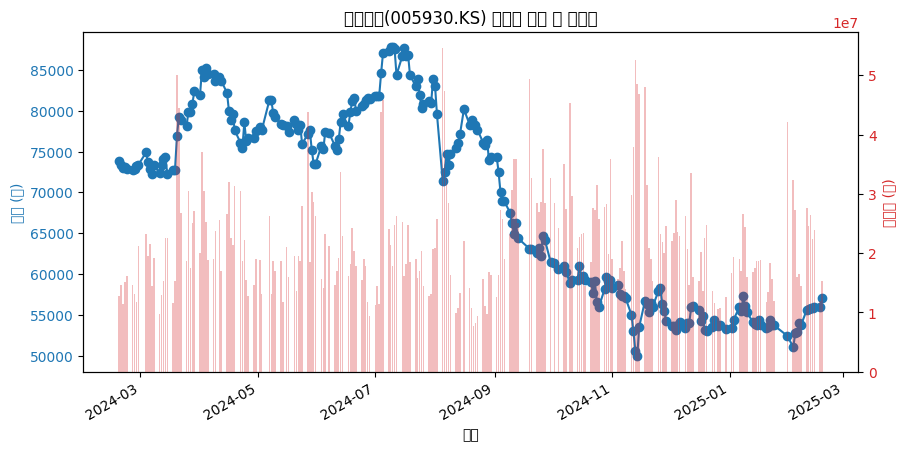

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Yahoo Finance URL (삼성전자 히스토리 페이지)
url = "https://finance.yahoo.com/quote/005930.KS/history/"

# HTTP 요청
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# 테이블 데이터 찾기
rows = soup.find_all("tr", class_="yf-1jecxey")

# 데이터 저장용 리스트
data = []

# 데이터 추출
for row in rows:
    cols = row.find_all("td")
    if len(cols) >= 7:
        date = cols[0].text.strip()
        close_price = cols[4].text.strip().replace(',', '')
        volume = cols[6].text.strip().replace(',', '')
        try:
            close_price = float(close_price)
            volume = int(volume)
            data.append([date, close_price, volume])
        except ValueError:
            continue  # 데이터 오류가 있을 경우 스킵

# DataFrame 생성
df = pd.DataFrame(data, columns=["날짜", "종가", "거래량"])

# 날짜 데이터를 datetime 형식으로 변환
df["날짜"] = pd.to_datetime(df["날짜"])

# 날짜순 정렬
df = df.sort_values(by="날짜")

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(10, 5))

# 첫 번째 y축 (종가)
ax1.set_xlabel("날짜")
ax1.set_ylabel("종가 (원)", color="tab:blue")
ax1.plot(df["날짜"], df["종가"], marker="o", linestyle="-", color="tab:blue", label="종가")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# 두 번째 y축 (거래량)
ax2 = ax1.twinx()
ax2.set_ylabel("거래량 (주)", color="tab:red")
ax2.bar(df["날짜"], df["거래량"], color="tab:red", alpha=0.3, label="거래량")
ax2.tick_params(axis="y", labelcolor="tab:red")

# 타이틀 및 레이아웃 설정
plt.title("삼성전자(005930.KS) 날짜별 종가 및 거래량")
fig.autofmt_xdate()  # 날짜 포맷 자동 조정
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

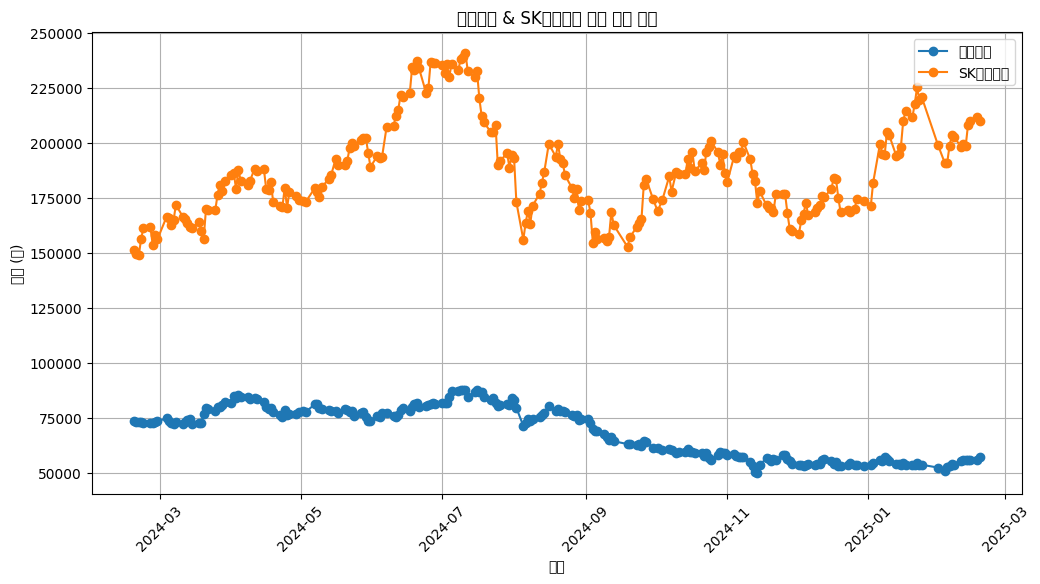

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# 웹 크롤링 함수 정의
def get_stock_data(url, stock_name):
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    rows = soup.find_all("tr", class_="yf-1jecxey")
    data = []

    for row in rows:
        cols = row.find_all("td")
        if len(cols) >= 7:
            date = cols[0].text.strip()
            close_price = cols[4].text.strip().replace(',', '')  # 종가
            try:
                close_price = float(close_price)
                data.append([date, close_price, stock_name])
            except ValueError:
                continue  # 데이터 오류 시 스킵

    return pd.DataFrame(data, columns=["날짜", "종가", "종목"])

# 삼성전자(005930.KS)와 SK하이닉스(000660.KS) 데이터 크롤링
samsung_df = get_stock_data("https://finance.yahoo.com/quote/005930.KS/history/", "삼성전자")
sk_hynix_df = get_stock_data("https://finance.yahoo.com/quote/000660.KS/history/", "SK하이닉스")

# 두 개의 데이터프레임 합치기
df = pd.concat([samsung_df, sk_hynix_df])

# 날짜 데이터 변환 및 정렬
df["날짜"] = pd.to_datetime(df["날짜"])
df = df.sort_values(by="날짜")

# 종목별로 종가 추세선 시각화
plt.figure(figsize=(12, 6))
for stock in df["종목"].unique():
    subset = df[df["종목"] == stock]
    plt.plot(subset["날짜"], subset["종가"], marker="o", linestyle="-", label=stock)

plt.xlabel("날짜")
plt.ylabel("종가 (원)")
plt.title("삼성전자 & SK하이닉스 종가 추세 비교")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
